In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [3]:
# Define column names for the dataset
columns = ["duration", "protocoltype", "service", "flag", "srcbytes", "dstbytes", "land",
           "wrongfragment", "urgent", "hot", "numfailedlogins", "loggedin", "numcompromised",
           "rootshell", "suattempted", "numroot", "numfilecreations", "numshells",
           "numaccessfiles", "numoutboundcmds", "ishostlogin", "isguestlogin", "count",
           "srvcount", "serrorrate", "srvserrorrate", "rerrorrate", "srvrerrorrate",
           "samesrvrate", "diffsrvrate", "srvdiffhostrate", "dsthostcount", "dsthostsrvcount",
           "dsthostsamesrvrate", "dsthostdiffsrvrate", "dsthostsamesrcportrate",
           "dsthostsrvdiffhostrate", "dsthostserrorrate", "dsthostsrvserrorrate",
           "dsthostrerrorrate", "dsthostsrvrerrorrate", "attack", "lastflag"]

# Load dataset
data = pd.read_csv("train.txt", sep=",", names=columns)
data_test = pd.read_csv("test.txt", sep=",", names=columns)

# Data Preprocessing
# Dropping irrelevant features
data.drop(['land', 'urgent', 'numfailedlogins', 'numoutboundcmds'], axis=1, inplace=True)

# Handling missing values in the training dataset
cl_data = data.dropna(axis=0)

# Encoding categorical variables
label_encoder = LabelEncoder()
for col in ['protocoltype', 'service', 'flag', 'attack']:
    data[col] = label_encoder.fit_transform(data[col])

# Convert 'attack' feature to binary classification
data['attack'] = np.where(data['attack'] != "normal", "attack", "normal")
data['attack'] = label_encoder.fit_transform(data['attack'])


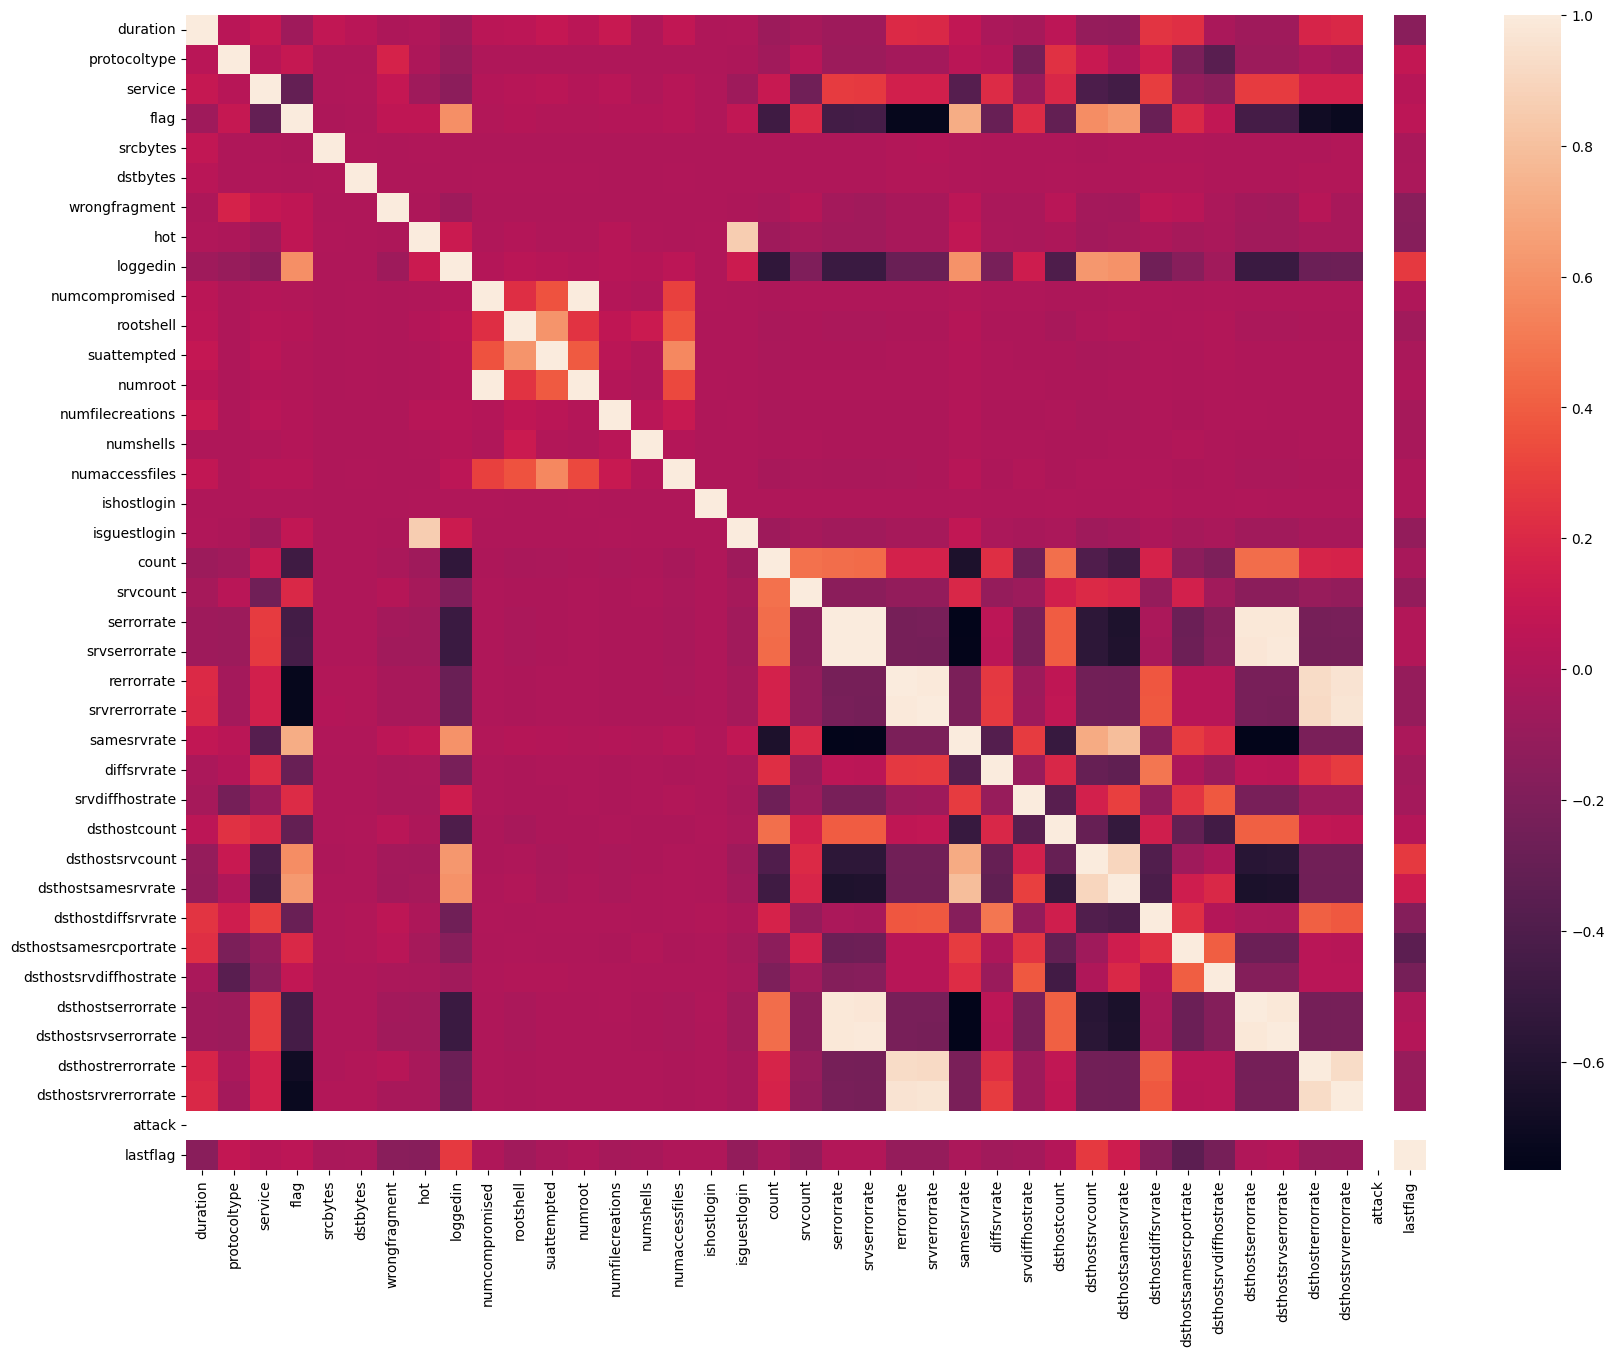

In [4]:
# Feature correlation visualization
plt.figure(figsize=(20, 15))
sns.heatmap(data.corr())
plt.show()

In [6]:
scaler = MinMaxScaler()

# clean_data
clean_data = data.dropna(axis=0)
X = clean_data.drop("attack", axis=1)
y = clean_data['attack']

X.fillna(0, inplace=True)

# Feature Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Random Forest Model Training with Hyperparameter Tuning
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['sqrt'],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True]
}
# Hyperparameter tuning using RandomizedSearchCV
rfc_random = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=param_dist,
                                verbose=1, n_iter=10, cv=5, random_state=42, n_jobs=-1)
rfc_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
# Displaying the best parameters
print("Best Parameters:", rfc_random.best_params_)

# Model Evaluation with the best estimator
best_rfc = rfc_random.best_estimator_
rfc_best_pred = best_rfc.predict(X_test)

# Evaluation Metrics
print("Improved Accuracy:", accuracy_score(y_test, rfc_best_pred))
print("Improved ROC-AUC Score:", roc_auc_score(y_test, rfc_best_pred))
print("Improved Classification Report:\n", classification_report(y_test, rfc_best_pred))
print("Improved Confusion Matrix:\n", confusion_matrix(y_test, rfc_best_pred))